## Gradient Descent

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
adv=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/Advertising.csv')
train,test=train_test_split(adv,test_size=0.2,random_state=100)

In [32]:
train_x=train[['TV']]
train_y=train['sales']

In [33]:
#we do scaling or normalization so that we can compare the columns
scaler=StandardScaler()
scaler.fit(train_x)
train_x_scaled=pd.DataFrame(scaler.transform(train_x),columns=train_x.columns,index=train_x.index)

In [34]:
########using the linear regression model to calculate the coefficients################
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x_scaled,train_y)
print(model.coef_,model.intercept_)
#######################################################################################

[4.18753862] 13.798750000000002


In [35]:
#continuation..
m_old=100
c_old=100
m_values=[]
c_values=[]
error_values=[]

N=train_x_scaled.shape[0]
alpha=0.1

for i in range(1000):
    #update m
    sum_part=(2/N)*((-1*train_x_scaled['TV']*train_y)+\
                   (m_old*np.square(train_x_scaled['TV']))+\
                    (c_old*train_x_scaled['TV'])).sum()
    m_new=m_old-alpha*sum_part

    #update c
    sum_part = (2/N)*(m_old*train_x_scaled['TV']+\
                     c_old-train_y).sum()
    c_new=c_old-alpha*sum_part
    
    #calculate error
    error= (1/N)*(train_y-m_new*train_x_scaled['TV']-c_old).sum()
    
    m_values.append(m_new)
    c_values.append(c_new)
    error_values.append(error)
    
    m_old=m_new
    c_old=c_new
m_new,c_new

(4.187538615177148, 13.798750000000004)

In [36]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plt

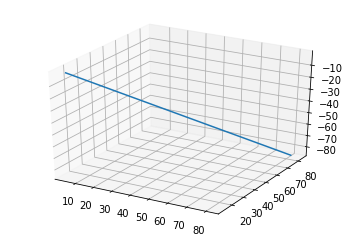

In [37]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.plot(m_values,c_values,error_values)
plt.show()

## PCA

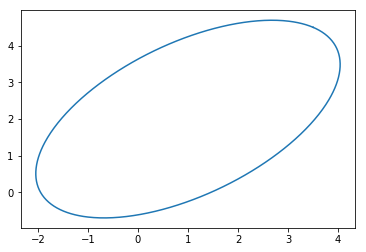

In [38]:
data=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/ellipse.csv')
plt.plot(data['x'],data['y'])

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
pca=PCA()
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
pcs=pd.DataFrame(pca.transform(data_scaled),
                columns=['PC1','PC2'])
pcs.shape,data.shape

((629, 2), (629, 2))

1. Data dimension == PCA dimension
2. no meaning to PCs, its just numbers, basically no unit
3. PCs variances = eigen values of correlation of data
4. correlation between Pcs will alwasy be zero

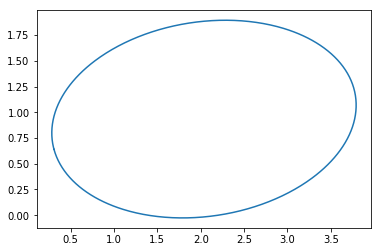

In [45]:
plt.plot(pcs['PC1'],pcs['PC2'])
plt.show()

In [46]:
pcs.corr()

,PC1,PC2
PC1,1.000000,0.141384
PC2,0.141384,1.000000


In [47]:
np.linalg.eig(pd.DataFrame(data_scaled).corr())

(array([1.552432, 0.447568]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

If we use only one PC and skip the other then the plotting is reduced to 1D